In [1]:
import pandas as pd

df = pd.read_csv('thesis_titles_with_toponyms.csv', index_col=0)
df.head()

,author,title,year,places
0,Jean Spanjersberg,De institutionele groei van het Nederlandse on...,1983,[]
1,Dick de Winter,Disciplinering van protestgedrag van havenarbe...,1983,[]
2,Christi Boerdam,Ongehuwde moeders te Rotterdam in het laatste ...,1983,"[['Rotterdam', '4.479167', '51.930833']]"
3,B W H Guyt,De visserij op de Noordzee : de lage landen aa...,1983,"[['North Sea', '3.0', '56.0']]"
4,Harma Tent,Het beeld van de Amerikaanse indiaan in Iberis...,1983,"[['United States', '-100.0', '40.0']]"


In [2]:
# put all toponyms in dataframe

from ast import literal_eval

df['places'] = df['places'].apply(literal_eval)
places = df["places"].tolist()
p = []
for i in places:
    if i:
        for x in i:
            p.append(x)
labels = ['places', 'longitude', 'latitude']
dfp = pd.DataFrame.from_records(p, columns=labels)
dfp.head()

,places,longitude,latitude
0,Rotterdam,4.479167,51.930833
1,North Sea,3.0,56.0
2,United States,-100.0,40.0
3,Middle East,35.6,32.8
4,Netherlands,5.55,52.316667


In [3]:
dfp[['latitude','longitude']] = dfp[['latitude','longitude']].apply(pd.to_numeric)
dfp['latitude'].head()

0    51.930833
1    56.000000
2    40.000000
3    32.800000
4    52.316667
Name: latitude, dtype: float64

In [4]:
dfp['Coordinates'] = list(zip(dfp.longitude, dfp.latitude))
dfp.head()

,places,longitude,latitude,Coordinates
0,Rotterdam,4.479167,51.930833,"(4.4791669999999995, 51.930833)"
1,North Sea,3.000000,56.000000,"(3.0, 56.0)"
2,United States,-100.000000,40.000000,"(-100.0, 40.0)"
3,Middle East,35.600000,32.800000,"(35.6, 32.8)"
4,Netherlands,5.550000,52.316667,"(5.55, 52.316666999999995)"


In [5]:
from geopandas import GeoDataFrame
from shapely.geometry import Point

geometry = [Point(xy) for xy in list(zip(dfp.longitude, dfp.latitude))]
crs = {'init': 'epsg:4326'}
gdf = GeoDataFrame(dfp, crs=crs, geometry=geometry)
gdf.head()

,places,longitude,latitude,Coordinates,geometry
0,Rotterdam,4.479167,51.930833,"(4.4791669999999995, 51.930833)",POINT (4.479166999999999 51.930833)
1,North Sea,3.000000,56.000000,"(3.0, 56.0)",POINT (3 56)
2,United States,-100.000000,40.000000,"(-100.0, 40.0)",POINT (-100 40)
3,Middle East,35.600000,32.800000,"(35.6, 32.8)",POINT (35.6 32.8)
4,Netherlands,5.550000,52.316667,"(5.55, 52.316666999999995)",POINT (5.55 52.316667)


In [6]:
%matplotlib inline
import geopandas

world = geopandas.read_file(geopandas.datasets.get_path('naturalearth_lowres'))
world = world[(world.pop_est>0) & (world.name!="Antarctica")]

# count points in national geometries
world['points_count'] = world.apply(lambda x: gdf.geometry.within(x.geometry).sum(), axis=1)
world.head()


,pop_est,continent,name,iso_a3,gdp_md_est,geometry,points_count
0,28400000.0,Asia,Afghanistan,AFG,22270.0,"POLYGON ((61.21081709172574 35.65007233330923,...",0
1,12799293.0,Africa,Angola,AGO,110300.0,(POLYGON ((16.32652835456705 -5.87747039146621...,0
2,3639453.0,Europe,Albania,ALB,21810.0,"POLYGON ((20.59024743010491 41.85540416113361,...",0
3,4798491.0,Asia,United Arab Emirates,ARE,184300.0,"POLYGON ((51.57951867046327 24.24549713795111,...",0
4,40913584.0,South America,Argentina,ARG,573900.0,(POLYGON ((-65.50000000000003 -55.199999999999...,1


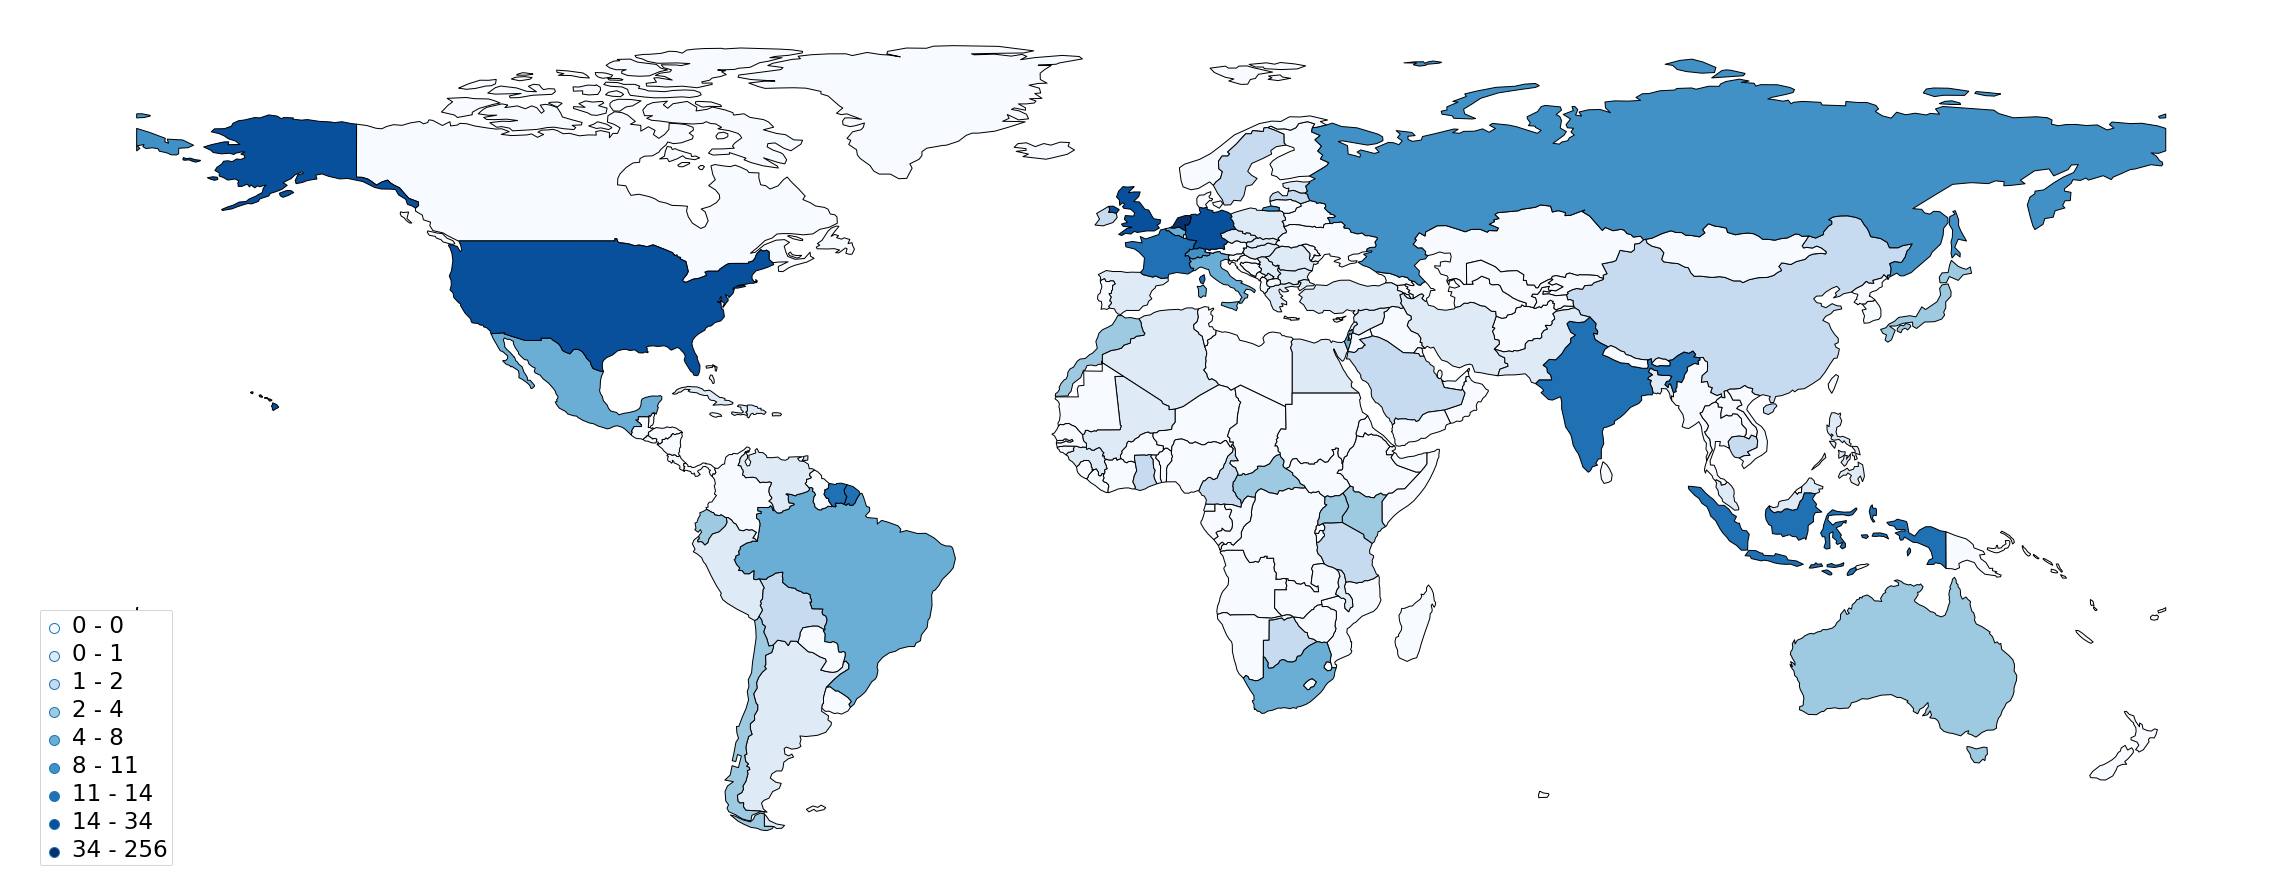

In [25]:
%matplotlib inline

import matplotlib.pylab as plt

ax = world.plot(edgecolor='black', column='points_count', cmap='Blues', scheme='fisher_jenks', k=9, legend=True, legend_kwds={'loc':'lower left'}, figsize=(40,40))
leg = ax.get_legend()

# turn legend floats to int
for i in leg.get_texts():
    i.set_text(i.get_text().replace(".00", ""))

plt.setp(ax.get_legend().get_texts(), fontsize='23')

ax.axis('off')
plt.show()

In [26]:
#ax.get_figure().savefig('choropleth_map.png', dpi=300)
ax.get_figure().savefig('choropleth_map.png')